In [0]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision.datasets import CIFAR10
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
print('PyTorch version:', torch.__version__)

PyTorch version: 1.5.0+cu101


In [3]:
# we select to work on GPU if it is available in the machine, otherwise
# will run on CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!ls "/content/drive/My Drive/TFG/ImageNet/"

train_32x32.tar  valid_32x32.tar


In [6]:
!tar -xvf "/content/drive/My Drive/TFG/ImageNet/train_32x32.tar"

Se han truncado las últimas 5000 líneas del flujo de salida.
train_32x32/0200574.png
train_32x32/0702476.png
train_32x32/0211165.png
train_32x32/1059853.png
train_32x32/0910878.png
train_32x32/0452159.png
train_32x32/1054937.png
train_32x32/0174642.png
train_32x32/0597696.png
train_32x32/0444726.png
train_32x32/0044471.png
train_32x32/0668251.png
train_32x32/0100331.png
train_32x32/0344534.png
train_32x32/0795684.png
train_32x32/0717383.png
train_32x32/0943898.png
train_32x32/0860823.png
train_32x32/1142203.png
train_32x32/1073457.png
train_32x32/0519259.png
train_32x32/1104981.png
train_32x32/0265943.png
train_32x32/1244205.png
train_32x32/0485947.png
train_32x32/0404759.png
train_32x32/1073034.png
train_32x32/1240520.png
train_32x32/0242501.png
train_32x32/0012722.png
train_32x32/1021105.png
train_32x32/1173054.png
train_32x32/0413326.png
train_32x32/0117108.png
train_32x32/1108537.png
train_32x32/0479630.png
train_32x32/1210985.png
train_32x32/0558507.png
train_32x32/0925637.png
tra

In [7]:
!tar -xvf "/content/drive/My Drive/TFG/ImageNet/valid_32x32.tar"

Se han truncado las últimas 5000 líneas del flujo de salida.
valid_32x32/26037.png
valid_32x32/43465.png
valid_32x32/03665.png
valid_32x32/39098.png
valid_32x32/28047.png
valid_32x32/39191.png
valid_32x32/39504.png
valid_32x32/28676.png
valid_32x32/30796.png
valid_32x32/20709.png
valid_32x32/10193.png
valid_32x32/49145.png
valid_32x32/30217.png
valid_32x32/01205.png
valid_32x32/04080.png
valid_32x32/37986.png
valid_32x32/20172.png
valid_32x32/42121.png
valid_32x32/27495.png
valid_32x32/36548.png
valid_32x32/29007.png
valid_32x32/23613.png
valid_32x32/34361.png
valid_32x32/29600.png
valid_32x32/02824.png
valid_32x32/47702.png
valid_32x32/11672.png
valid_32x32/41850.png
valid_32x32/36708.png
valid_32x32/30289.png
valid_32x32/15991.png
valid_32x32/24494.png
valid_32x32/32412.png
valid_32x32/15364.png
valid_32x32/07417.png
valid_32x32/43446.png
valid_32x32/27579.png
valid_32x32/05840.png
valid_32x32/41553.png
valid_32x32/44980.png
valid_32x32/10010.png
valid_32x32/29566.png
valid_32x32/012

In [8]:
# Download CIFAR10 dataset
cifar_trainset = CIFAR10('data', train=True, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5,), (0.5,))
                                ]))

cifar_validset = CIFAR10('data', train=False, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5,), (0.5,))
                                ]))

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [9]:
# CIFAR Info
img, label = cifar_trainset[0]
print('Img shape: ', img.shape)
print('Label: ', label)

Img shape:  torch.Size([3, 32, 32])
Label:  6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


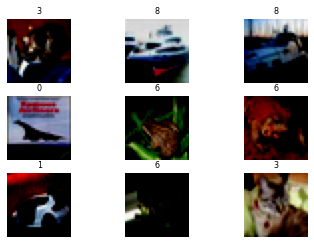

In [10]:
# CIFAR10 Plot (image and label)
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # extract the image and label
  [img, label] = cifar_validset[i]
  # plot image and label
  plt.title(label, fontsize=8)
  i = np.transpose(img, (1, 2, 0))
  plt.imshow(i, vmin=0, vmax=255)
  plt.axis('off')
# show the figure
plt.show()

In [0]:
!mkdir train
!mkdir val

In [0]:
!mv train_32x32 train
!mv valid_32x32/ val

In [0]:
train_dir = 'train'
valid_dir = 'val'

In [0]:
transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))
                            ])

In [0]:
imagenet_trainset = ImageFolder(train_dir, transform=transform)
imagenet_validset = ImageFolder(valid_dir, transform=transform)

In [16]:
# ImageNet Info
img, label = imagenet_trainset[0]
print('Img shape: ', img.shape)
print('Label: ', label)

Img shape:  torch.Size([3, 32, 32])
Label:  0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


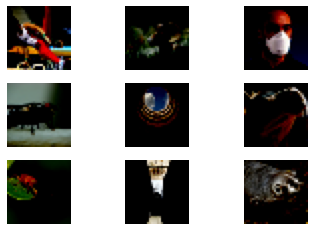

In [17]:
# ImageNet Plot (image and label)
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # extract the image and label
  [img, label] = imagenet_trainset[i]
  # plot image and label
  i = np.transpose(img, (1, 2, 0))
  plt.imshow(i, vmin=0, vmax=255)
  plt.axis('off')
# show the figure
plt.show()

In [18]:
len(imagenet_trainset[0][0][2])

32

In [19]:
len(cifar_trainset[0][0])

3

In [20]:
# We create a new image Z(4,28,28) of each cifar image
CIFAR=[]
for i in range(len(cifar_trainset)):
  m = torch.empty(6,32,32)
  m[0,:,:]=cifar_trainset[i][0][0]          # channel 0 to 2 = CIFAR image
  m[1,:,:]=cifar_trainset[i][0][1]           
  m[2,:,:]=cifar_trainset[i][0][2]         
  m[3,:,:]=imagenet_trainset[i][0][0]          # channel 3 to 5 = RGB image
  m[4,:,:]=imagenet_trainset[i][0][1] 
  m[5,:,:]=imagenet_trainset[i][0][2]                   
  CIFAR.append((m, cifar_trainset[i][1]))

print(len(CIFAR), CIFAR[0][0].size())

50000 torch.Size([6, 32, 32])


In [21]:
# We create a new image Z(6,28,28) of each cifar image in validset
CIFAR_V=[]
for i in range(len(cifar_validset)):
  v = torch.empty(6,32,32)
  v[0,:,:]=cifar_validset[i][0][0]           # channel 1 = pixel value
  v[1,:,:]=cifar_validset[i][0][1]
  v[2,:,:]=cifar_validset[i][0][2]
  v[3,:,:]=imagenet_validset[i][0][0]           # channel 3 to 5 = RGB image
  v[4,:,:]=imagenet_validset[i][0][1] 
  v[5,:,:]=imagenet_validset[i][0][2]
  CIFAR_V.append((v, cifar_validset[i][1]))

print(len(CIFAR_V), CIFAR_V[0][0].size())

10000 torch.Size([6, 32, 32])


In [0]:
batch_size = 64
batch_size_val = 64

In [0]:
# Setup data loaders
train_loader = torch.utils.data.DataLoader( 
    CIFAR,
    batch_size=batch_size, 
    shuffle=True)

valid_loader = torch.utils.data.DataLoader( 
    CIFAR_V,
    batch_size=batch_size_val, 
    shuffle=False)

In [0]:
# UNet
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # 32 x 32
        self.conv1_e1 = ConvAct(6, 16)
        #self.conv1_e1 = ConvAct(2, 16)       
        self.conv1_e2 = ConvAct(16, 16)
        self.down1 = nn.MaxPool2d(2, 2)

        # 16 x 16
        self.conv2_e1 = ConvAct(16, 32)
        self.conv2_e2 = ConvAct(32, 32)
        self.down2 = nn.MaxPool2d(2, 2)
        
        # 8 x 8
        self.conv3_e1 = ConvAct(32, 64)
        self.conv3_e2 = ConvAct(64, 64)
        self.down3 = nn.MaxPool2d(2, 2)
        
        # 4 x 4
        self.conv4_e1 = ConvAct(64, 128)
        self.conv4_e2 = ConvAct(128, 128)
        self.down4 = nn.MaxPool2d(2, 2)

        # 2 x 2
        self.conv5_1 = ConvAct(128, 256)
        self.conv5_2 = ConvAct(256, 256)
        
        # 4 x 4
        self.up4 = nn.ConvTranspose2d(256, 128, 3, 2, 1, 1)
        self.reSample1 = nn.Upsample(size=(4,4), mode='bilinear')
        self.conv4_d1 = ConvAct(256, 128)
        self.conv4_d2 = ConvAct(128, 128)

        # 8 x 8
        self.up3 = nn.ConvTranspose2d(128, 64, 3, 2, 1, 1)
        self.reSample2 = nn.Upsample(size=(8,8), mode='bilinear')
        self.conv3_d1 = ConvAct(128, 64)
        self.conv3_d2 = ConvAct(64, 64)

        # 16 x 16
        self.up2 = nn.ConvTranspose2d(64, 32, 3, 2, 1, 1)
        self.conv2_d1 = ConvAct(64, 32)
        self.conv2_d2 = ConvAct(32, 32)

        # 32 x 32
        self.up1 = nn.ConvTranspose2d(32, 16, 3, 2, 1, 1)
        self.conv1_d1 = ConvAct(32, 16)
        self.conv1_d2 = ConvAct(16, 16)

        self.output_layer = nn.Conv2d(16, 3, 3, 1, 1)
        #self.output_layer = nn.Conv2d(16, 1, 3, 1, 1)

    def forward(self, x):
        
        # level 1 - encode
        x = self.conv1_e1(x)
        x = out1 = self.conv1_e2(x)
        x = self.down1(x)

        # level 2 - encode
        x = self.conv2_e1(x)
        x = out2 = self.conv2_e2(x)
        x = self.down2(x)

        # level 3 - encode
        x = self.conv3_e1(x)
        x = out3 = self.conv3_e2(x)
        x = self.down3(x)

        # level 4 - encode
        x = self.conv4_e1(x)
        x = out4 = self.conv4_e2(x)
        x = self.down4(x)

        # level 5 - encode/decode
        x = self.conv5_1(x)
        x = self.conv5_2(x)

        # level 4 - decode
        x = self.up4(x)
        #x = self.reSample1(x)
        x = torch.cat((x, out4), dim=1)
        x = self.conv4_d1(x)
        x = self.conv4_d2(x)

        # level 3 - decode
        x = self.up3(x)
        #x = self.reSample2(x)
        x = torch.cat((x, out3), dim=1)
        x = self.conv3_d1(x)
        x = self.conv3_d2(x)

        # level 2 - decode
        x = self.up2(x)
        x = torch.cat((x, out2), dim=1)
        x = self.conv2_d1(x)
        x = self.conv2_d2(x)

        # level 1 - decode
        x = self.up1(x)
        x = torch.cat((x, out1), dim=1)
        x = self.conv1_d1(x)
        x = self.conv1_d2(x)

        x = self.output_layer(x)
        return x
    

_named_activations = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'prelu': nn.PReLU,
    'leakyrelu': nn.LeakyReLU,
    'elu': nn.ELU
}


def same_padding(kernel, dilation):
    return int((kernel + (kernel - 1) * (dilation - 1) - 1) / 2)


def get_activation_by_name(name, **kwargs):
    return _named_activations[name](**kwargs)


class ConvAct(nn.Module):
    """Conv->Activation"""
    def __init__(
            self, in_channels, out_channels,
            kernel=3, dilation=1, activation='relu'):
        super(ConvAct, self).__init__()
        padding = same_padding(kernel, dilation)
        self.conv = nn.Conv2d(
            in_channels, out_channels, kernel,
            padding=padding,
            dilation=dilation)
        self.activation = get_activation_by_name(activation)
        self.reset_parameters()

    def reset_parameters(self):
        self.conv.reset_parameters()
        nn.init.xavier_uniform_(self.conv.weight)

    def forward(self, x):
        return self.activation(self.conv(x))

In [0]:
# UNet
class UNet2(nn.Module):
    def __init__(self):
        super(UNet2, self).__init__()

        # 32 x 32
        self.conv1_e1 = ConvAct(3, 16)
        #self.conv1_e1 = ConvAct(2, 16)       
        self.conv1_e2 = ConvAct(16, 16)
        self.down1 = nn.MaxPool2d(2, 2)

        # 16 x 16
        self.conv2_e1 = ConvAct(16, 32)
        self.conv2_e2 = ConvAct(32, 32)
        self.down2 = nn.MaxPool2d(2, 2)
        
        # 8 x 8
        self.conv3_e1 = ConvAct(32, 64)
        self.conv3_e2 = ConvAct(64, 64)
        self.down3 = nn.MaxPool2d(2, 2)
        
        # 4 x 4
        self.conv4_e1 = ConvAct(64, 128)
        self.conv4_e2 = ConvAct(128, 128)
        self.down4 = nn.MaxPool2d(2, 2)

        # 2 x 2
        self.conv5_1 = ConvAct(128, 256)
        self.conv5_2 = ConvAct(256, 256)
        
        # 4 x 4
        self.up4 = nn.ConvTranspose2d(256, 128, 3, 2, 1, 1)
        self.reSample1 = nn.Upsample(size=(4,4), mode='bilinear')
        self.conv4_d1 = ConvAct(256, 128)
        self.conv4_d2 = ConvAct(128, 128)

        # 8 x 8
        self.up3 = nn.ConvTranspose2d(128, 64, 3, 2, 1, 1)
        self.reSample2 = nn.Upsample(size=(8,8), mode='bilinear')
        self.conv3_d1 = ConvAct(128, 64)
        self.conv3_d2 = ConvAct(64, 64)

        # 16 x 16
        self.up2 = nn.ConvTranspose2d(64, 32, 3, 2, 1, 1)
        self.conv2_d1 = ConvAct(64, 32)
        self.conv2_d2 = ConvAct(32, 32)

        # 32 x 32
        self.up1 = nn.ConvTranspose2d(32, 16, 3, 2, 1, 1)
        self.conv1_d1 = ConvAct(32, 16)
        self.conv1_d2 = ConvAct(16, 16)

        self.output_layer = nn.Conv2d(16, 3, 3, 1, 1)
        #self.output_layer = nn.Conv2d(16, 1, 3, 1, 1)

    def forward(self, x):
        
        # level 1 - encode
        x = self.conv1_e1(x)
        x = out1 = self.conv1_e2(x)
        x = self.down1(x)

        # level 2 - encode
        x = self.conv2_e1(x)
        x = out2 = self.conv2_e2(x)
        x = self.down2(x)

        # level 3 - encode
        x = self.conv3_e1(x)
        x = out3 = self.conv3_e2(x)
        x = self.down3(x)

        # level 4 - encode
        x = self.conv4_e1(x)
        x = out4 = self.conv4_e2(x)
        x = self.down4(x)

        # level 5 - encode/decode
        x = self.conv5_1(x)
        x = self.conv5_2(x)

        # level 4 - decode
        x = self.up4(x)
        #x = self.reSample1(x)
        x = torch.cat((x, out4), dim=1)
        x = self.conv4_d1(x)
        x = self.conv4_d2(x)

        # level 3 - decode
        x = self.up3(x)
        #x = self.reSample2(x)
        x = torch.cat((x, out3), dim=1)
        x = self.conv3_d1(x)
        x = self.conv3_d2(x)

        # level 2 - decode
        x = self.up2(x)
        x = torch.cat((x, out2), dim=1)
        x = self.conv2_d1(x)
        x = self.conv2_d2(x)

        # level 1 - decode
        x = self.up1(x)
        x = torch.cat((x, out1), dim=1)
        x = self.conv1_d1(x)
        x = self.conv1_d2(x)

        x = self.output_layer(x)
        return x
    

_named_activations = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'prelu': nn.PReLU,
    'leakyrelu': nn.LeakyReLU,
    'elu': nn.ELU
}


def same_padding(kernel, dilation):
    return int((kernel + (kernel - 1) * (dilation - 1) - 1) / 2)


def get_activation_by_name(name, **kwargs):
    return _named_activations[name](**kwargs)


class ConvAct(nn.Module):
    """Conv->Activation"""
    def __init__(
            self, in_channels, out_channels,
            kernel=3, dilation=1, activation='relu'):
        super(ConvAct, self).__init__()
        padding = same_padding(kernel, dilation)
        self.conv = nn.Conv2d(
            in_channels, out_channels, kernel,
            padding=padding,
            dilation=dilation)
        self.activation = get_activation_by_name(activation)
        self.reset_parameters()

    def reset_parameters(self):
        self.conv.reset_parameters()
        nn.init.xavier_uniform_(self.conv.weight)

    def forward(self, x):
        return self.activation(self.conv(x))

In [0]:
network = UNet()
network.to(device);

In [0]:
network2 = UNet2()
network2.to(device);

In [0]:
#optimizer1 = optim.Adam(network.parameters(), lr=0.01)
optimizer1 = optim.SGD(network.parameters(), lr=0.01, momentum=0.9, nesterov=True)
optimizer2 = optim.SGD(network2.parameters(), lr=0.01, momentum=0.9, nesterov=True)

criterion1 = nn.MSELoss()
#criterion2 = nn.CrossEntropyLoss()
criterion2 = nn.MSELoss()

In [0]:
def train_epoch(train_loader, network, network2, optimizer1, optimizer2, criterion1, criterion2):

  network.train()
  network2.train()
  
  avg_losses = []
  clf_losses = []

  avg_weight = 0.5
  clf_weight = 1.0 - avg_weight

  # for each batch
  for batch_idx, (data, target) in enumerate(train_loader):
      
      # move training data to the GPU
      data, target = data.to(device), target.to(device)
      image = data[:, 0:3, :, :].detach()

      # clear previous gradient computation
      optimizer1.zero_grad()
      optimizer2.zero_grad()

      # froward propagation 
      output = network(data)
      output2 = network2(output)
      
      # calculate loss
      loss1 = criterion1(output, image)
      loss2 = criterion2(output2, data[:,-3:,:,:])

      total_loss = avg_weight * loss1 + clf_weight * loss2
      total_loss.backward()
      
      # update model weights
      optimizer1.step()
      optimizer2.step()
      
      avg_losses.append(float(loss1.item()))
      clf_losses.append(float(loss2.item()))

      # print progress
      if batch_idx % 100 == 0:
          print(f'[{epoch}] {batch_idx:03d}/{len(train_loader)} '
                f'avg_loss: {loss1.item():.06f} '
                f'clf_loss: {loss2.item():.06f} ')
          
  # calc avg losses
  avg_loss = np.mean(avg_losses)
  clf_loss = np.mean(clf_losses)

  return avg_loss, clf_loss, output, output2

In [0]:
def eval_epoch(val_loader, network, network2, criterion1, criterion2):
    network.eval()
    network2.eval()

    avg_losses = []
    clf_losses = []

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(valid_loader):
          # move training data to the GPU
          data, target = data.to(device), target.to(device)
          image = data[:, 0:3, :, :].detach()

          # froward propagation 
          output = network(data)
          output2 = network2(output)
          
          # calculate loss
          loss1 = criterion1(output, image)
          loss2 = criterion2(output2, data[:,-3:,:,:])

          avg_losses.append(float(loss1.item()))
          clf_losses.append(float(loss2.item()))

    # calc avg losses
    avg_loss = np.mean(avg_losses)
    clf_loss = np.mean(clf_losses)

        
    print('Valid Epoch: {} \tLoss: {:.6f}\tLoss2: {:.6f}\t \n'.format(
                epoch, avg_loss, clf_loss))

    return avg_loss, clf_loss, output, output2, data

In [0]:
num_epochs = 100

In [49]:
# Init lists to save the evolution of the training & test losses/accuracy.
avg_losses = []
clf_losses = []
avgvalid_losses = []
clfvalid_losses = []
images = []

# For each epoch
for epoch in range(1, num_epochs + 1):

  # Compute & save the average training loss for the current epoch
  avg_loss, clf_loss, output, output2 = train_epoch(train_loader, network, network2, optimizer1, optimizer2, criterion1, criterion2)
  avg_losses.append(avg_loss)
  clf_losses.append(clf_loss)

  avgval_loss, clfval_loss, val_output, val_output2, data = eval_epoch(valid_loader, network, network2, criterion1, criterion2)
  avgvalid_losses.append(avgval_loss)
  clfvalid_losses.append(clfval_loss)
  images.append(data)


[1] 000/782 avg_loss: 0.007051 clf_loss: 0.009406 
[1] 100/782 avg_loss: 0.006103 clf_loss: 0.040740 
[1] 200/782 avg_loss: 0.005609 clf_loss: 0.008572 
[1] 300/782 avg_loss: 0.006079 clf_loss: 0.006446 
[1] 400/782 avg_loss: 0.005080 clf_loss: 0.007941 
[1] 500/782 avg_loss: 0.007407 clf_loss: 0.009523 
[1] 600/782 avg_loss: 0.007573 clf_loss: 0.007284 
[1] 700/782 avg_loss: 0.005894 clf_loss: 0.009674 
Valid Epoch: 1 	Loss: 0.006263	Loss2: 0.008101	 

[2] 000/782 avg_loss: 0.005232 clf_loss: 0.008349 
[2] 100/782 avg_loss: 0.006561 clf_loss: 0.006767 
[2] 200/782 avg_loss: 0.004591 clf_loss: 0.012059 
[2] 300/782 avg_loss: 0.005926 clf_loss: 0.014736 
[2] 400/782 avg_loss: 0.006421 clf_loss: 0.009159 
[2] 500/782 avg_loss: 0.008455 clf_loss: 0.009556 
[2] 600/782 avg_loss: 0.006354 clf_loss: 0.007528 
[2] 700/782 avg_loss: 0.006576 clf_loss: 0.023140 
Valid Epoch: 2 	Loss: 0.006535	Loss2: 0.024689	 

[3] 000/782 avg_loss: 0.006534 clf_loss: 0.025984 
[3] 100/782 avg_loss: 0.006501 cl

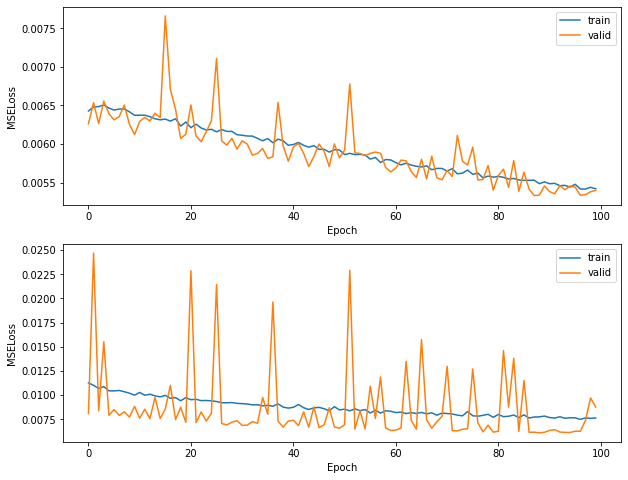

In [50]:
# Loss function plots
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.xlabel('Epoch')
plt.ylabel('MSELoss')
plt.plot(avg_losses, label='train')
plt.plot(avgvalid_losses, label='valid')
plt.legend()
plt.subplot(2,1,2)
plt.xlabel('Epoch')
plt.ylabel('MSELoss')
plt.plot(clf_losses, label='train')
plt.plot(clfvalid_losses, label='valid')
plt.legend()

In [51]:
 a = np.mean(avg_losses)
b = np.mean(clf_losses)
c = np.mean(avgvalid_losses)
d = np.mean(clfvalid_losses)
print("Train: AvgLoss", a, "\tClfLoss ", b)
#print("Valid: AvgLoss", c, "\tClfLoss ", d)

Train: AvgLoss 0.005912287662057634 	ClfLoss  0.008729710674557663


In [52]:
#Original image = message
o1=data[:,-3:,:,:].data.cpu()
o1.size()

torch.Size([16, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


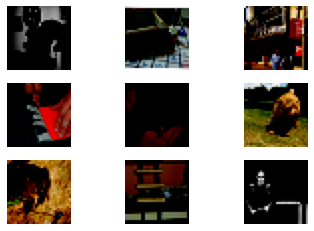

In [53]:
# Plot the first 9 original images and it's label
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # extract the image and label
  img = o1[i]
  # plot MNIST image and label
  #plt.imshow(img.numpy()[0], cmap=plt.get_cmap('gray'))
  # plot CIFAR image and label
  i = np.transpose(img, (1, 2, 0))
  plt.imshow(i, vmin=0, vmax=255)
  plt.axis('off')
# show the figure
plt.show()

In [54]:
# Train - Original image = message
o1=output2.data.cpu()
o1.size()

torch.Size([16, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


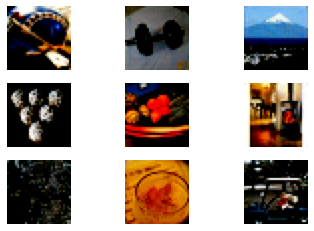

In [55]:
# Plot the first 9 original images and it's label
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # extract the image and label
  img = o1[i]
  # plot MNIST image and label
  #plt.imshow(img.numpy()[0], cmap=plt.get_cmap('gray'))
  # plot CIFAR image and label
  i = np.transpose(img, (1, 2, 0))
  plt.imshow(i, vmin=0, vmax=255)
  plt.axis('off')
# show the figure
plt.show()

In [56]:
# Train - steganography image
f=output.data.cpu()
f.size()

torch.Size([16, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


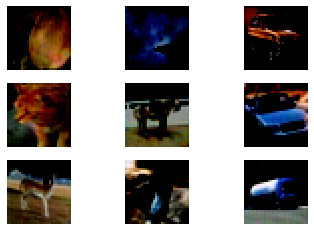

In [57]:
# Plot the first 9 steganography images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # extract the image and label
  img = f[i]
  # plot MNIST image and label
  #plt.imshow(img.numpy()[0], cmap=plt.get_cmap('gray'))
  # plot CIFAR image and label
  i = np.transpose(img, (1, 2, 0))
  plt.imshow(i, interpolation='nearest')
  plt.axis('off')
# show the figure
plt.show()

In [58]:
# Validation - Original image = message
vo=val_output2.data.cpu()
vo.size()

torch.Size([16, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


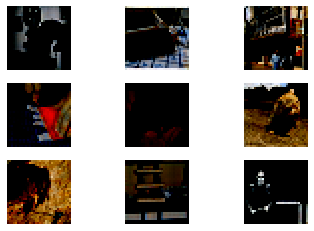

In [59]:
# Plot the first 9 steganography images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # extract the image and label
  img = vo[i]
  # plot MNIST image and label
  #plt.imshow(img.numpy()[0], cmap=plt.get_cmap('gray'))
  # plot CIFAR image and label
  i = np.transpose(img, (1, 2, 0))
  plt.imshow(i, interpolation='nearest')
  plt.axis('off')
# show the figure
plt.show()

In [60]:
# Validation - steganography image
vo1=val_output.data.cpu()
vo1.size()

torch.Size([16, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


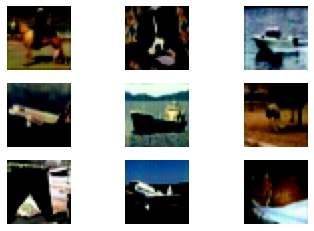

In [61]:
# Plot the first 9 original images and it's label
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # extract the image and label
  img = vo1[i]
  # plot MNIST image and label
  #plt.imshow(img.numpy()[0], cmap=plt.get_cmap('gray'))
  # plot CIFAR image and label
  i = np.transpose(img, (1, 2, 0))
  plt.imshow(i, vmin=0, vmax=255)
  plt.axis('off')
# show the figure
plt.show()